<a href="https://colab.research.google.com/github/2004Likhitha/AIML/blob/main/AIML_III_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

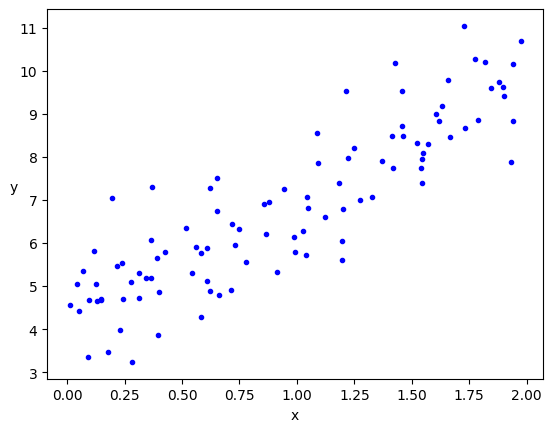

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

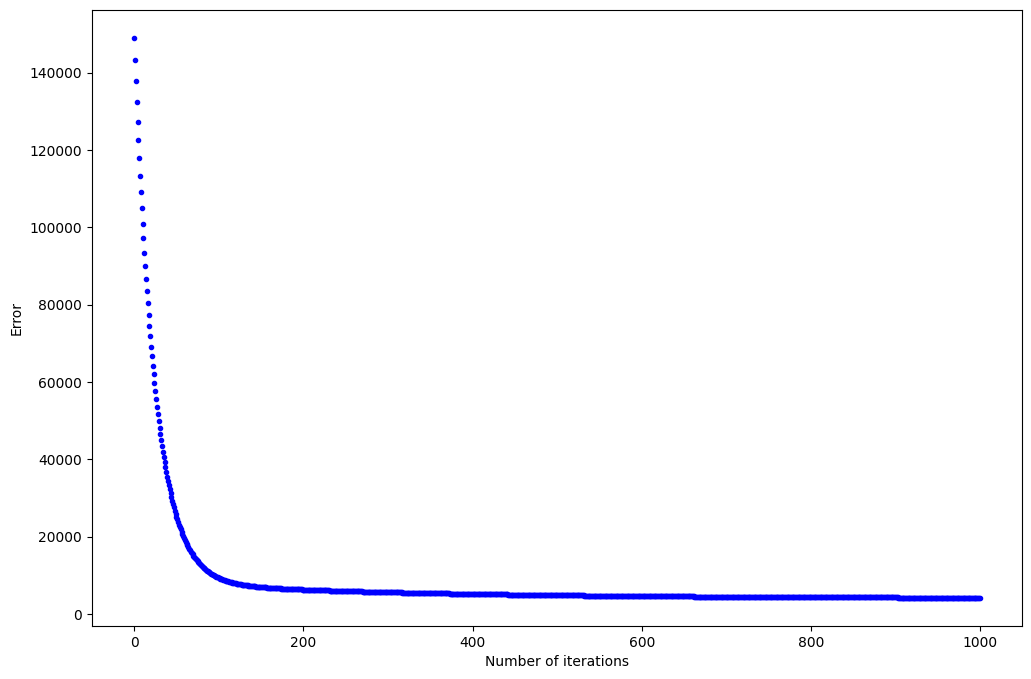

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

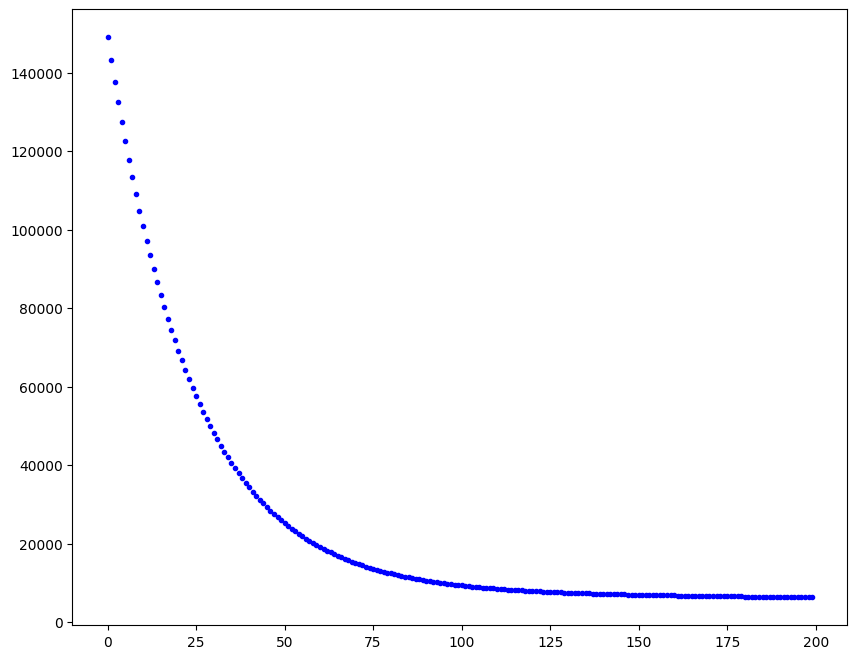

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


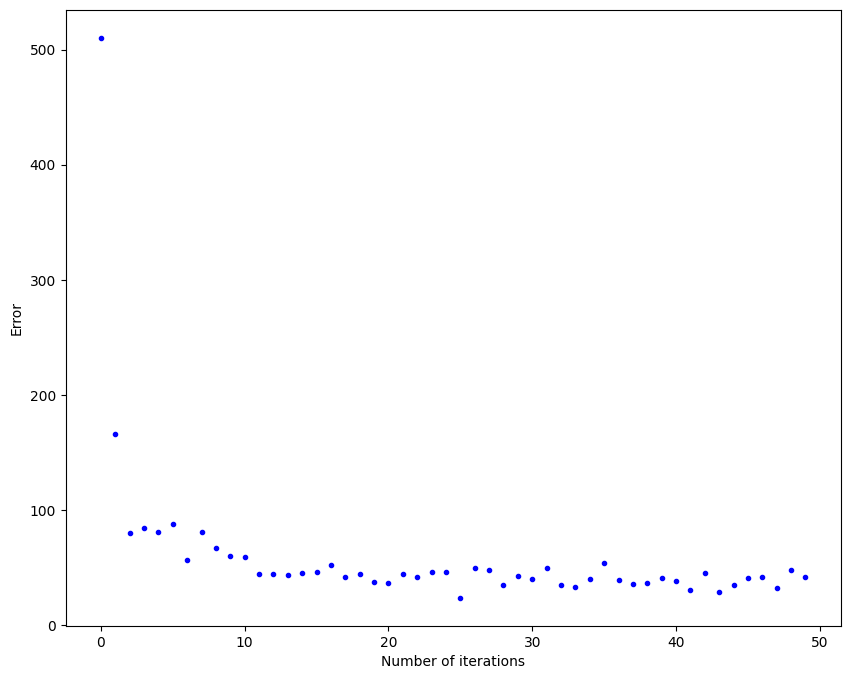

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


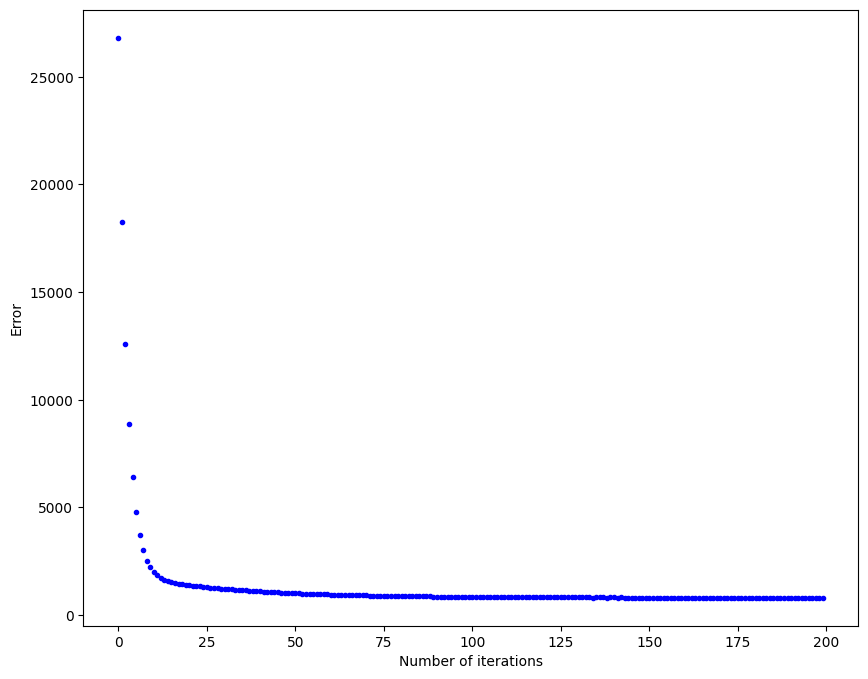

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

Batch Size: 10
y_pred[0]: 4.220
y_pred[1]: 2.778
Final error: 0.394
Batch Size: 20
y_pred[0]: 4.214
y_pred[1]: 2.773
Final error: 0.397
Batch Size: 30
y_pred[0]: 4.224
y_pred[1]: 2.779
Final error: 0.523


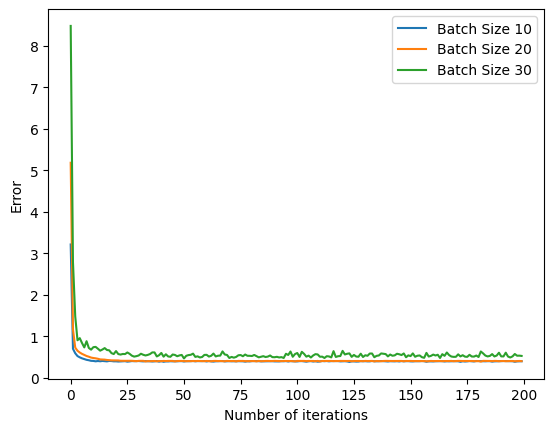

In [16]:
# Changing batch size in mini-batch gradient descent
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Define the mini-batch gradient descent function
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]  # Add bias term
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / batch_size) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / n_batches  # Average cost over all batches

    return y_pred, cost_history

# Generate data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize model parameters
initial_y_pred = np.random.randn(2,1)

# Parameters for gradient descent
lr = 0.1
n_iter = 200

# Experiment with different batch sizes
batch_sizes = [10, 20, 30]
for batch_size in batch_sizes:
    # Run mini-batch gradient descent
    y_pred, cost_history = minibatch_gradient_descent(X, y, initial_y_pred, lr, n_iter, batch_size=batch_size)

    # Print results
    print(f'Batch Size: {batch_size}')
    print(f'y_pred[0]: {y_pred[0][0]:.3f}\ny_pred[1]: {y_pred[1][0]:.3f}')
    print(f'Final error: {cost_history[-1]:.3f}')

    # Plot cost history
    plt.plot(range(n_iter), cost_history, label=f'Batch Size {batch_size}')

plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

<ipython-input-18-38ea541aab7a>:29: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
<ipython-input-18-38ea541aab7a>:58: RuntimeWarning: overflow encountered in scalar add
  cost += cal_cost(y_pred, X_i, y_i)
<ipython-input-18-38ea541aab7a>:57: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))


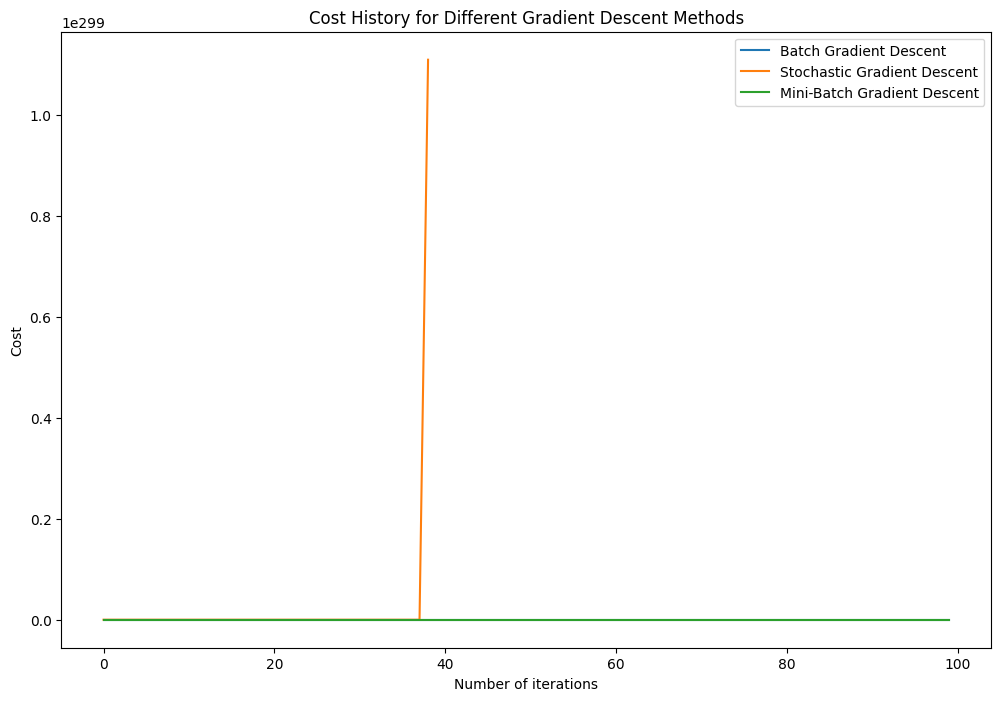

In [18]:
# Testing all the three on real datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)  # Reshape y to be a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term
X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]

            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / m

    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / batch_size) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / (m / batch_size)

    return y_pred, cost_history

# Parameters
learning_rate = 0.01
iterations = 100
batch_size = 50

# Initialize weights
initial_y_pred = np.random.randn(X_train_biased.shape[1], 1)

# Run Gradient Descent
y_pred_gd, cost_history_gd = gradient_descent(X_train_biased, y_train, initial_y_pred, learning_rate, iterations)

# Run Stochastic Gradient Descent
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X_train_biased, y_train, initial_y_pred, learning_rate, iterations)

# Run Mini-Batch Gradient Descent
y_pred_mini_batch, cost_history_mini_batch = minibatch_gradient_descent(X_train_biased, y_train, initial_y_pred, learning_rate, iterations, batch_size)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(range(iterations), cost_history_gd, label='Batch Gradient Descent')
plt.plot(range(iterations), cost_history_sgd, label='Stochastic Gradient Descent')
plt.plot(range(iterations), cost_history_mini_batch, label='Mini-Batch Gradient Descent')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost History for Different Gradient Descent Methods')
plt.show()


<ipython-input-19-e68930751b57>:29: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
<ipython-input-19-e68930751b57>:57: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


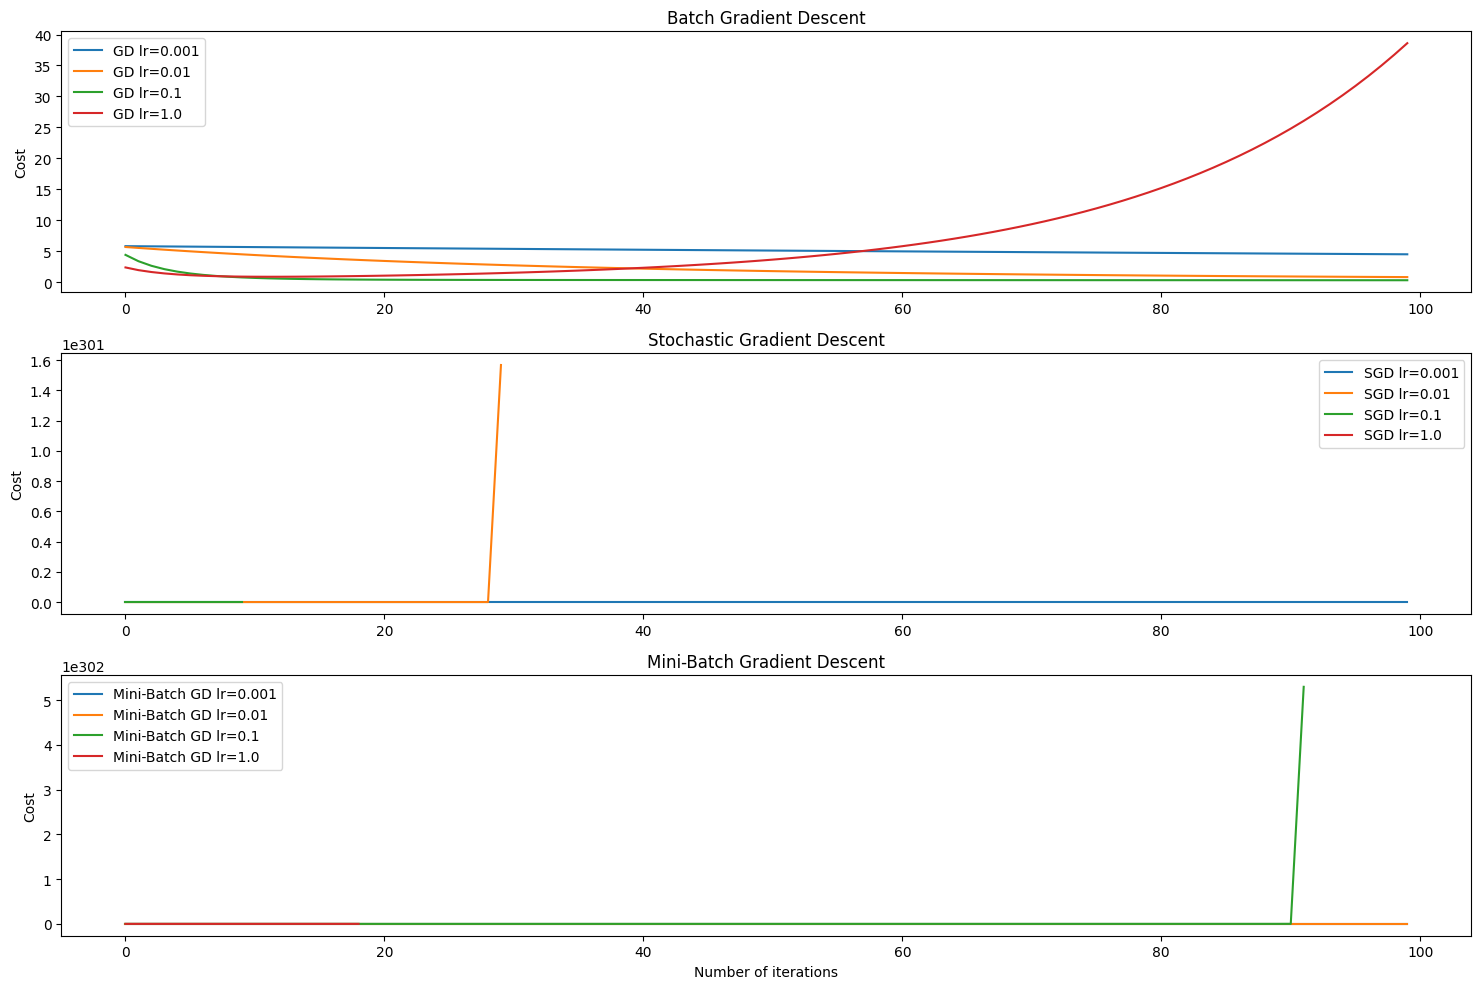

In [19]:
# Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare the dataset
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)  # Reshape y to be a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term
X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]

            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / m

    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / batch_size) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / (m / batch_size)

    return y_pred, cost_history

# Parameters
iterations = 100
batch_size = 50

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1.0]

# Initialize weights
initial_y_pred = np.random.randn(X_train_biased.shape[1], 1)

# Plotting
plt.figure(figsize=(15, 10))

for lr in learning_rates:
    # Batch Gradient Descent
    y_pred_gd, cost_history_gd = gradient_descent(X_train_biased, y_train, initial_y_pred.copy(), lr, iterations)

    # Stochastic Gradient Descent
    y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X_train_biased, y_train, initial_y_pred.copy(), lr, iterations)

    # Mini-Batch Gradient Descent
    y_pred_mini_batch, cost_history_mini_batch = minibatch_gradient_descent(X_train_biased, y_train, initial_y_pred.copy(), lr, iterations, batch_size)

    # Plot costs
    plt.subplot(3, 1, 1)
    plt.plot(range(iterations), cost_history_gd, label=f'GD lr={lr}')
    plt.ylabel('Cost')
    plt.title('Batch Gradient Descent')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(range(iterations), cost_history_sgd, label=f'SGD lr={lr}')
    plt.ylabel('Cost')
    plt.title('Stochastic Gradient Descent')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(range(iterations), cost_history_mini_batch, label=f'Mini-Batch GD lr={lr}')
    plt.ylabel('Cost')
    plt.title('Mini-Batch Gradient Descent')
    plt.xlabel('Number of iterations')
    plt.legend()

plt.tight_layout()
plt.show()


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

- The statement provided is not entirely accurate. The optimal learning rate can improve the performance of gradient descent algorithms, but it does not guarantee convergence to the global optimum of the loss function.


 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

- The statement "Stochastic Gradient Descent (SGD) is always guaranteed to converge to the global optimum of a loss function" is not entirely true.
Stochastic Gradient Descent (SGD) does not guarantee convergence to the global optimum for non-convex loss functions. In practice, SGD can converge to local minima or saddle points rather than the global minimum, particularly in high-dimensional and complex loss landscapes.


 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 - For convex loss functions (i.e., loss functions with a bowl shape), the statements about Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD) can be summarized as follows:

- Batch Gradient Descent:

- Convergence: For convex loss functions, Batch Gradient Descent is indeed guaranteed to eventually converge to the global optimum. This is because BGD systematically uses the entire dataset to compute the gradient, ensuring that the updates move in a direction that reduces the loss consistently, leading to convergence to the global minimum.
Stochastic Gradient Descent:

- Convergence: Stochastic Gradient Descent (SGD) is not guaranteed to converge to the global optimum even for convex loss functions. While SGD can be effective and efficient, especially for large datasets, its convergence behavior is influenced by the randomness introduced by using only a single data point or a small subset (mini-batch) for each update. This randomness can cause fluctuations in the path of convergence.

- Guaranteed Convergence: Despite the fluctuations, SGD is still capable of converging to the global optimum for convex loss functions under the right conditions (e.g., appropriately chosen learning rates and decay schedules). However, the convergence path might be noisier compared to BGD.



 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 - The statement is false. For convex loss functions, Batch Gradient Descent is guaranteed to converge to the global optimum because it systematically updates using the entire dataset. Stochastic Gradient Descent can converge to the global optimum as well, but its convergence is not guaranteed due to the noise introduced by using a single or mini-batch of data points for each update.


 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 - The statement is true. For convex loss functions, both Stochastic Gradient Descent (SGD) and Batch Gradient Descent are theoretically guaranteed to converge to the global optimum, though SGD might take longer and exhibit more fluctuations. Batch Gradient Descent updates parameters using the entire dataset, providing more stable convergence, while SGD uses individual or mini-batches, leading to noisier but eventually convergent results.


 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

 - The statement is false. For convex loss functions, both Stochastic Gradient Descent (SGD) and Batch Gradient Descent are theoretically guaranteed to converge to the global optimum, assuming the learning rate is appropriately chosen and other conditions are met. While SGD may experience fluctuations due to its stochastic nature, and Batch Gradient Descent is more stable but can be computationally intensive, both methods converge to the global minimum in the case of convex loss functions.